In [1]:
import get_data
import keras_cnn as cnn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

C:\Users\Administrator\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
data = get_data.GetData()
day_balance = data.get_day_purchase()
timeseries = np.array(day_balance['total_purchase_amt'])
min_max_scalar = MinMaxScaler()
timeseries = min_max_scalar.fit_transform(timeseries.reshape(-1,1))

D:\workspace\Pycharm\get_data.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  day_purchase['report_date'] = pd.to_datetime(day_purchase['report_date'], format=('%Y%m%d'))
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [22]:
window_size = 20
filter_length = 5
nb_filter = 16
timeseries = np.atleast_2d(timeseries)
if timeseries.shape[0] == 1:
    timeseries = timeseries.T  # Convert 1D vectors to 2D column vectors

nb_samples, nb_series = timeseries.shape
# print('\n\nTimeseries ({} samples by {} series):\n'.format(nb_samples, nb_series), timeseries)
model = cnn.make_timeseries_regressor(window_size=window_size, filter_length=filter_length, nb_input_series=nb_series, nb_outputs=nb_series, nb_filter=nb_filter)
# print('\n\nModel with input size {}, output size {}, {} conv filters of length {}'.format(model.input_shape, model.output_shape,                                                                                             nb_filter, filter_length))
model.summary()
X, y, q = cnn.make_timeseries_instances(timeseries, window_size)
# print('\n\nInput features:', X, '\n\nOutput labels:', y, '\n\nQuery vector:', q, sep='\n')
test_size = 30  # In real life you'd want to use 0.2 - 0.5
X_train, X_test, y_train, y_test = X[:-test_size], X[-test_size:], y[:-test_size], y[-test_size:]
history = model.fit(X_train, y_train, validation_split=0.3, nb_epoch=500, batch_size=100, validation_data=(X_test, y_test))


D:\workspace\Pycharm\keras_cnn.py:53: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", input_shape=(20, 1), filters=16, kernel_size=5)`
  input_shape=(window_size, nb_input_series)),
D:\workspace\Pycharm\keras_cnn.py:55: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=32, kernel_size=5)`
  Convolution1D(nb_filter=nb_filter * 2, filter_length=filter_length, activation='relu'),


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_13 (Conv1D)           (None, 16, 16)            96        
_________________________________________________________________
max_pooling1d_13 (MaxPooling (None, 8, 16)             0         
_________________________________________________________________
conv1d_14 (Conv1D)           (None, 4, 32)             2592      
_________________________________________________________________
max_pooling1d_14 (MaxPooling (None, 2, 32)             0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 65        
Total params: 2,753
Trainable params: 2,753
Non-trainable params: 0
_________________________________________________________________
Train on

377/377 [==============================] - 0s 66us/step - loss: 0.0078 - acc: 0.0000e+00 - val_loss: 0.0026 - val_acc: 0.0000e+00
Epoch 51/500
377/377 [==============================] - 0s 72us/step - loss: 0.0078 - acc: 0.0000e+00 - val_loss: 0.0026 - val_acc: 0.0000e+00
Epoch 52/500
377/377 [==============================] - 0s 58us/step - loss: 0.0078 - acc: 0.0000e+00 - val_loss: 0.0027 - val_acc: 0.0000e+00
Epoch 53/500
377/377 [==============================] - 0s 77us/step - loss: 0.0077 - acc: 0.0000e+00 - val_loss: 0.0026 - val_acc: 0.0000e+00
Epoch 54/500
377/377 [==============================] - 0s 111us/step - loss: 0.0076 - acc: 0.0000e+00 - val_loss: 0.0026 - val_acc: 0.0000e+00
Epoch 55/500
377/377 [==============================] - 0s 77us/step - loss: 0.0076 - acc: 0.0000e+00 - val_loss: 0.0026 - val_acc: 0.0000e+00
Epoch 56/500
377/377 [==============================] - 0s 74us/step - loss: 0.0076 - acc: 0.0000e+00 - val_loss: 0.0026 - val_acc: 0.0000e+00
Epoch 57/50

377/377 [==============================] - 0s 74us/step - loss: 0.0060 - acc: 0.0027 - val_loss: 0.0023 - val_acc: 0.0000e+00
Epoch 108/500
377/377 [==============================] - 0s 61us/step - loss: 0.0058 - acc: 0.0027 - val_loss: 0.0022 - val_acc: 0.0000e+00
Epoch 109/500
377/377 [==============================] - 0s 101us/step - loss: 0.0059 - acc: 0.0027 - val_loss: 0.0022 - val_acc: 0.0000e+00
Epoch 110/500
377/377 [==============================] - 0s 72us/step - loss: 0.0058 - acc: 0.0027 - val_loss: 0.0023 - val_acc: 0.0000e+00
Epoch 111/500
377/377 [==============================] - 0s 93us/step - loss: 0.0058 - acc: 0.0027 - val_loss: 0.0022 - val_acc: 0.0000e+00
Epoch 112/500
377/377 [==============================] - 0s 106us/step - loss: 0.0058 - acc: 0.0027 - val_loss: 0.0022 - val_acc: 0.0000e+00
Epoch 113/500
377/377 [==============================] - 0s 82us/step - loss: 0.0057 - acc: 0.0027 - val_loss: 0.0022 - val_acc: 0.0000e+00
Epoch 114/500
377/377 [=========

377/377 [==============================] - 0s 69us/step - loss: 0.0047 - acc: 0.0027 - val_loss: 0.0021 - val_acc: 0.0000e+00
Epoch 166/500
377/377 [==============================] - 0s 77us/step - loss: 0.0048 - acc: 0.0027 - val_loss: 0.0021 - val_acc: 0.0000e+00
Epoch 167/500
377/377 [==============================] - 0s 98us/step - loss: 0.0047 - acc: 0.0027 - val_loss: 0.0022 - val_acc: 0.0000e+00
Epoch 168/500
377/377 [==============================] - 0s 74us/step - loss: 0.0047 - acc: 0.0027 - val_loss: 0.0021 - val_acc: 0.0000e+00
Epoch 169/500
377/377 [==============================] - 0s 66us/step - loss: 0.0047 - acc: 0.0027 - val_loss: 0.0021 - val_acc: 0.0000e+00
Epoch 170/500
377/377 [==============================] - 0s 82us/step - loss: 0.0046 - acc: 0.0027 - val_loss: 0.0021 - val_acc: 0.0000e+00
Epoch 171/500
377/377 [==============================] - 0s 74us/step - loss: 0.0046 - acc: 0.0027 - val_loss: 0.0021 - val_acc: 0.0000e+00
Epoch 172/500
377/377 [===========

377/377 [==============================] - 0s 66us/step - loss: 0.0041 - acc: 0.0027 - val_loss: 0.0021 - val_acc: 0.0000e+00
Epoch 224/500
377/377 [==============================] - 0s 72us/step - loss: 0.0041 - acc: 0.0027 - val_loss: 0.0023 - val_acc: 0.0000e+00
Epoch 225/500
377/377 [==============================] - 0s 101us/step - loss: 0.0040 - acc: 0.0027 - val_loss: 0.0022 - val_acc: 0.0000e+00
Epoch 226/500
377/377 [==============================] - 0s 125us/step - loss: 0.0040 - acc: 0.0027 - val_loss: 0.0022 - val_acc: 0.0000e+00
Epoch 227/500
377/377 [==============================] - 0s 111us/step - loss: 0.0039 - acc: 0.0027 - val_loss: 0.0021 - val_acc: 0.0000e+00
Epoch 228/500
377/377 [==============================] - 0s 90us/step - loss: 0.0039 - acc: 0.0027 - val_loss: 0.0021 - val_acc: 0.0000e+00
Epoch 229/500
377/377 [==============================] - 0s 93us/step - loss: 0.0039 - acc: 0.0027 - val_loss: 0.0021 - val_acc: 0.0000e+00
Epoch 230/500
377/377 [========

377/377 [==============================] - 0s 69us/step - loss: 0.0034 - acc: 0.0027 - val_loss: 0.0022 - val_acc: 0.0000e+00
Epoch 282/500
377/377 [==============================] - 0s 66us/step - loss: 0.0033 - acc: 0.0027 - val_loss: 0.0022 - val_acc: 0.0000e+00
Epoch 283/500
377/377 [==============================] - 0s 61us/step - loss: 0.0033 - acc: 0.0027 - val_loss: 0.0022 - val_acc: 0.0000e+00
Epoch 284/500
377/377 [==============================] - 0s 66us/step - loss: 0.0033 - acc: 0.0027 - val_loss: 0.0022 - val_acc: 0.0000e+00
Epoch 285/500
377/377 [==============================] - 0s 58us/step - loss: 0.0033 - acc: 0.0027 - val_loss: 0.0022 - val_acc: 0.0000e+00
Epoch 286/500
377/377 [==============================] - 0s 77us/step - loss: 0.0034 - acc: 0.0027 - val_loss: 0.0022 - val_acc: 0.0000e+00
Epoch 287/500
377/377 [==============================] - 0s 74us/step - loss: 0.0033 - acc: 0.0027 - val_loss: 0.0022 - val_acc: 0.0000e+00
Epoch 288/500
377/377 [===========

377/377 [==============================] - 0s 109us/step - loss: 0.0029 - acc: 0.0027 - val_loss: 0.0021 - val_acc: 0.0000e+00
Epoch 340/500
377/377 [==============================] - 0s 98us/step - loss: 0.0029 - acc: 0.0027 - val_loss: 0.0021 - val_acc: 0.0000e+00
Epoch 341/500
377/377 [==============================] - 0s 101us/step - loss: 0.0029 - acc: 0.0027 - val_loss: 0.0021 - val_acc: 0.0000e+00
Epoch 342/500
377/377 [==============================] - 0s 90us/step - loss: 0.0030 - acc: 0.0027 - val_loss: 0.0021 - val_acc: 0.0000e+00
Epoch 343/500
377/377 [==============================] - 0s 87us/step - loss: 0.0030 - acc: 0.0027 - val_loss: 0.0023 - val_acc: 0.0000e+00
Epoch 344/500
377/377 [==============================] - 0s 93us/step - loss: 0.0029 - acc: 0.0027 - val_loss: 0.0023 - val_acc: 0.0000e+00
Epoch 345/500
377/377 [==============================] - 0s 90us/step - loss: 0.0030 - acc: 0.0027 - val_loss: 0.0022 - val_acc: 0.0000e+00
Epoch 346/500
377/377 [=========

377/377 [==============================] - 0s 95us/step - loss: 0.0027 - acc: 0.0027 - val_loss: 0.0021 - val_acc: 0.0000e+00
Epoch 398/500
377/377 [==============================] - 0s 85us/step - loss: 0.0025 - acc: 0.0027 - val_loss: 0.0023 - val_acc: 0.0000e+00
Epoch 399/500
377/377 [==============================] - 0s 82us/step - loss: 0.0026 - acc: 0.0027 - val_loss: 0.0021 - val_acc: 0.0000e+00
Epoch 400/500
377/377 [==============================] - 0s 80us/step - loss: 0.0025 - acc: 0.0027 - val_loss: 0.0022 - val_acc: 0.0000e+00
Epoch 401/500
377/377 [==============================] - 0s 72us/step - loss: 0.0025 - acc: 0.0027 - val_loss: 0.0021 - val_acc: 0.0000e+00
Epoch 402/500
377/377 [==============================] - 0s 69us/step - loss: 0.0025 - acc: 0.0027 - val_loss: 0.0021 - val_acc: 0.0000e+00
Epoch 403/500
377/377 [==============================] - 0s 77us/step - loss: 0.0024 - acc: 0.0027 - val_loss: 0.0020 - val_acc: 0.0000e+00
Epoch 404/500
377/377 [===========

Epoch 455/500
377/377 [==============================] - 0s 90us/step - loss: 0.0021 - acc: 0.0027 - val_loss: 0.0021 - val_acc: 0.0000e+00
Epoch 456/500
377/377 [==============================] - 0s 87us/step - loss: 0.0021 - acc: 0.0027 - val_loss: 0.0021 - val_acc: 0.0000e+00
Epoch 457/500
377/377 [==============================] - 0s 80us/step - loss: 0.0021 - acc: 0.0027 - val_loss: 0.0021 - val_acc: 0.0000e+00
Epoch 458/500
377/377 [==============================] - ETA: 0s - loss: 0.0018 - acc: 0.0000e+0 - 0s 69us/step - loss: 0.0021 - acc: 0.0027 - val_loss: 0.0021 - val_acc: 0.0000e+00
Epoch 459/500
377/377 [==============================] - 0s 82us/step - loss: 0.0021 - acc: 0.0027 - val_loss: 0.0021 - val_acc: 0.0000e+00
Epoch 460/500
377/377 [==============================] - 0s 72us/step - loss: 0.0021 - acc: 0.0027 - val_loss: 0.0021 - val_acc: 0.0000e+00
Epoch 461/500
377/377 [==============================] - 0s 77us/step - loss: 0.0021 - acc: 0.0027 - val_loss: 0.0022 

C:\Users\Administrator\Anaconda3\lib\site-packages\keras\models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


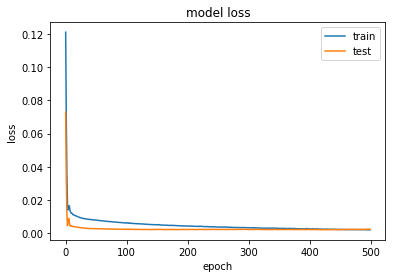

In [23]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

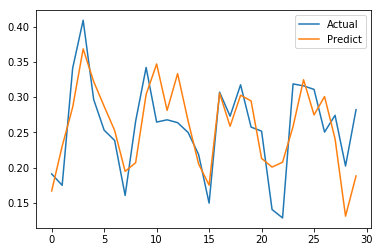

In [24]:
pred = model.predict(X_test)
plt.plot(y_test)
plt.plot(pred.squeeze())
plt.legend(['Actual', 'Predict'], loc='best')
# plt.ylim(0.5,1)
plt.show()

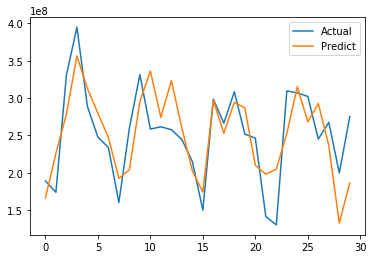

In [25]:
y_test_new = min_max_scalar.inverse_transform(y_test.reshape(-1,1))
pred_new = min_max_scalar.inverse_transform(pred.squeeze().reshape(-1,1))
plt.plot(y_test_new)
plt.plot(pred_new)
plt.ylim()
plt.legend(['Actual', 'Predict'], loc='best')
plt.show()